In [1]:
#import Relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Read the datasets

In [2]:
data = pd.read_csv('Train.csv')
test =pd.read_csv('Test.csv')

In [3]:
print(data.head())
print(test.head())

    Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   
3  Apcnt_1000012       3372.0      0.17005       0.5050          0.0   
4  Apcnt_1000016       3370.0      0.77270       1.1010          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0        0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1        0.000          0.0     898979.0     497531.0    9073814.0  ...   
2        6.282          NaN     956940.0          NaN     192944.0  ...   
3        0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4        0.000       1556.0     214728.0     214728.0    1284089.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.392854          2.02      0.7116

# Exploratory Data Analysis for providing Insights

In [4]:
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [5]:
print(data.count())
print(test.count())

Applicant_ID      56000
form_field1       53471
form_field2       52156
form_field3       55645
form_field4       55645
form_field5       55645
form_field6       42640
form_field7       50837
form_field8       42640
form_field9       47992
form_field10      55645
form_field11      24579
form_field12      46105
form_field13      50111
form_field14      56000
form_field15      33525
form_field16      42964
form_field17      44849
form_field18      45598
form_field19      55996
form_field20      55645
form_field21      40146
form_field22      35600
form_field23      27877
form_field24      42703
form_field25      50550
form_field26      48562
form_field27      46701
form_field28      55645
form_field29      55645
form_field30      30491
form_field31      16592
form_field32      50550
form_field33      54744
form_field34      55645
form_field35      32852
form_field36      54005
form_field37      50550
form_field38      55645
form_field39      51789
form_field40      12271
form_field41    

In [6]:
#Find the number of rows and columns in the data
print(data.shape,test.shape)

(56000, 52) (24000, 51)


In [7]:
#Give the summary statistics of  numeric data
data.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [8]:
#find the number of missing values for each column
print('missing values: ', data.isnull().sum())
print('missing values: ', test.isnull().sum())

missing values:  Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729

In [9]:
#find the percentage of missing value for each column
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis=1,join='outer',
keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False,
inplace=True)
missing_data

,count_missing,perc_missing
form_field40,43729,78.087500
form_field31,39408,70.371429
form_field41,38229,68.266071
form_field11,31421,56.108929
form_field45,31317,55.923214
form_field23,28123,50.219643
form_field30,25509,45.551786
form_field35,23148,41.335714
form_field15,22475,40.133929
form_field48,20889,37.301786


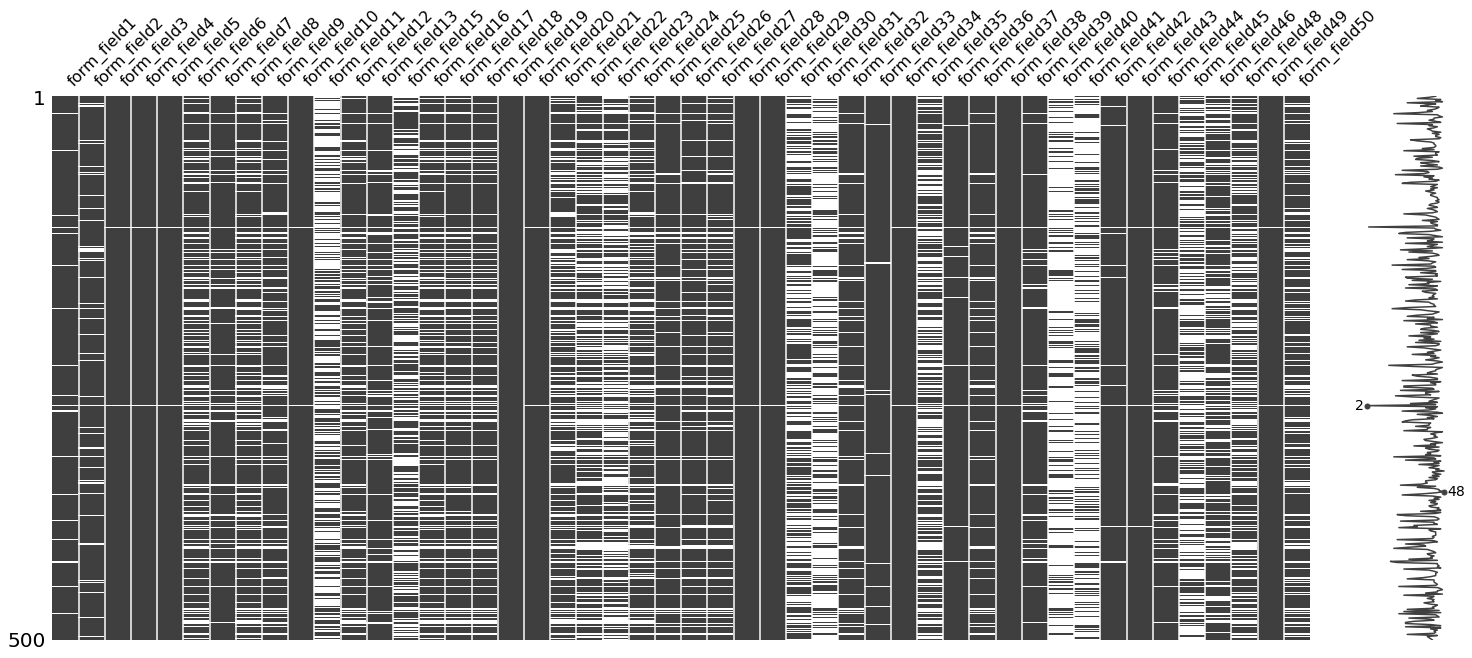

In [10]:
#visualize the missing values
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

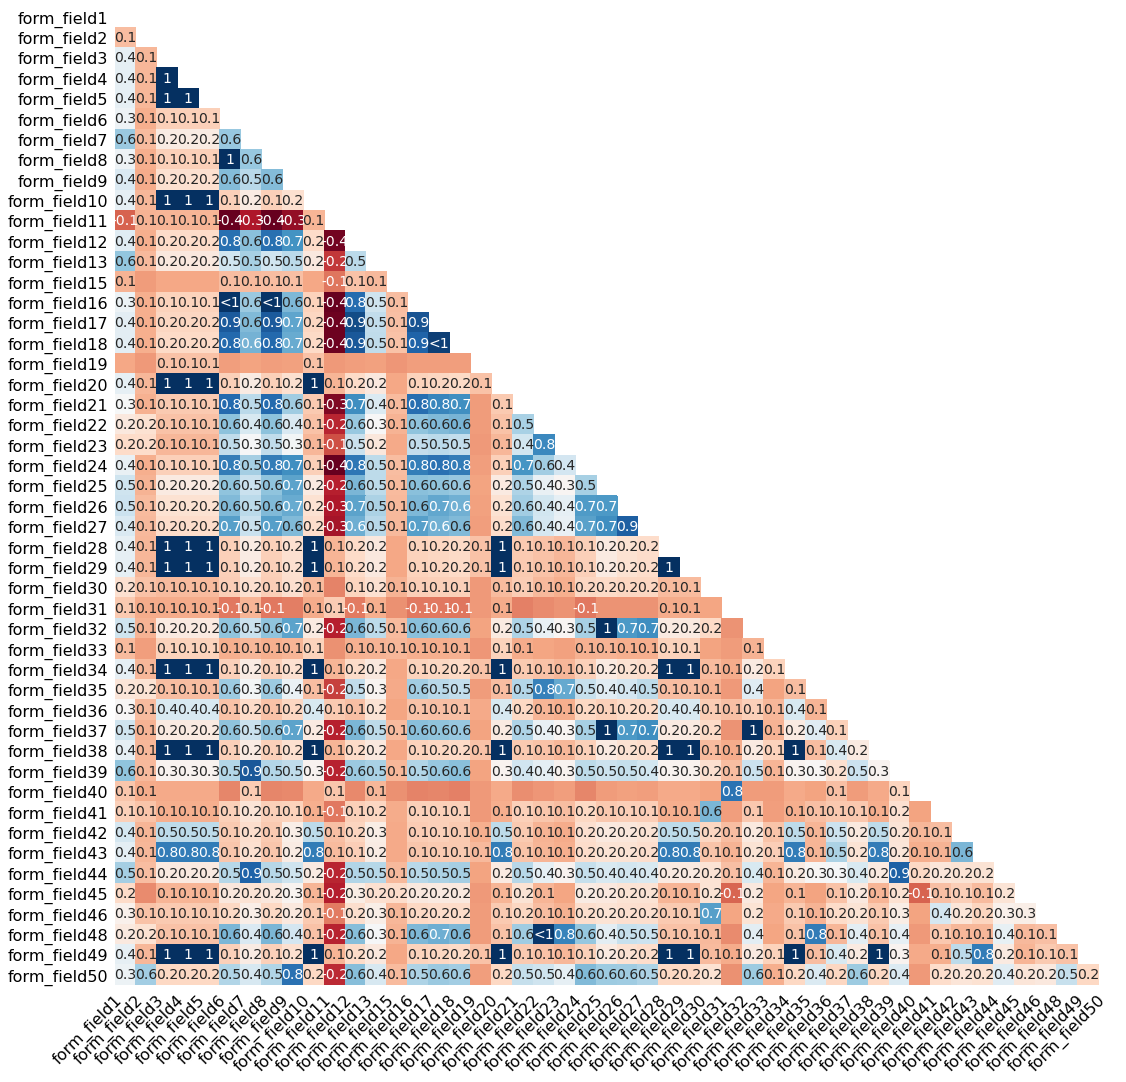

In [11]:
#plot nullity correlation matrix to find correlation between our missing values
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()

In [12]:
print(data.select_dtypes('float').columns)
print(data.select_dtypes('integer').columns)
print(data.select_dtypes('object').columns)

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field40', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')
Index(['form_field14'], dtype='object')
Index(['Applicant_ID', 'form_field47', 'default_status'], dtype='object')


In [13]:
# convert the label in string into integer
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['default'] = labelencoder.fit_transform(data['default_status'])
data

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,default
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,...,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,...,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,NaN,956940.0,NaN,192944.0,...,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,...,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,...,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,...,9.09,0.730040,NaN,0.0,lending,591.048913,0.000000,0.241598,no,0
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,NaN,927765.0,NaN,NaN,...,30.30,0.498208,NaN,0.0,lending,NaN,0.000000,NaN,yes,1
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,...,3.03,0.450512,0.0,0.0,lending,1252.474467,2.000000,0.163153,no,0
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,NaN,3458599.0,NaN,115533.0,...,0.00,0.705048,1.0,0.0,charge,NaN,0.000000,0.002997,no,0


In [14]:
#combine train and test data
ntrain = data.shape[0]
ntest = test.shape[0]
all_data = pd.concat((data, test)).reset_index(drop=True)

In [15]:
all_data.shape

(80000, 53)

In [16]:
#check for duplicate rows
duplicate_rows = all_data[all_data.duplicated()]
print(duplicate_rows.shape)

(0, 53)


In [17]:
print(all_data['form_field47'].unique())
print(all_data['default'].unique())
print(all_data['form_field14'].unique())

['charge' 'lending']
[ 0.  1. nan]
[96375139 28141427 16576457 ... 12790320 23025688 21850908]


In [18]:
print(all_data['form_field47'].value_counts())
print(all_data['default_status'].value_counts())
print(all_data['form_field14'].value_counts())

charge     51840
lending    28160
Name: form_field47, dtype: int64
no     42285
yes    13715
Name: default_status, dtype: int64
48187375     7154
34694910     7103
16576457     6365
21973443     5868
28141427     5867
             ... 
20855457        1
53525233        1
21896421        1
32501339        1
140707135       1
Name: form_field14, Length: 1566, dtype: int64


# EDA(VISUALIZATION)

<AxesSubplot:xlabel='default_status', ylabel='count'>

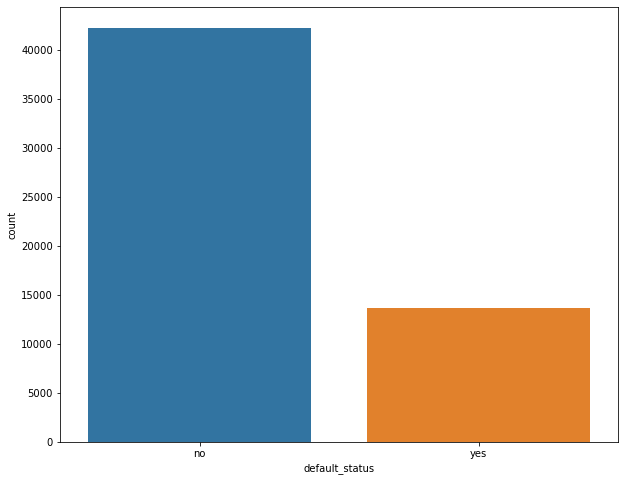

In [19]:
#visualize the target variable
plt.figure(figsize=(10,8))
sns.countplot(x='default_status', data = data)

<AxesSubplot:xlabel='default_status', ylabel='count'>

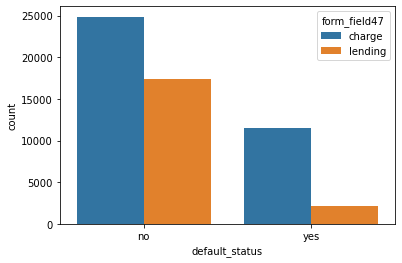

In [20]:
sns.countplot(x='default_status', hue='form_field47', data = data)

<AxesSubplot:>

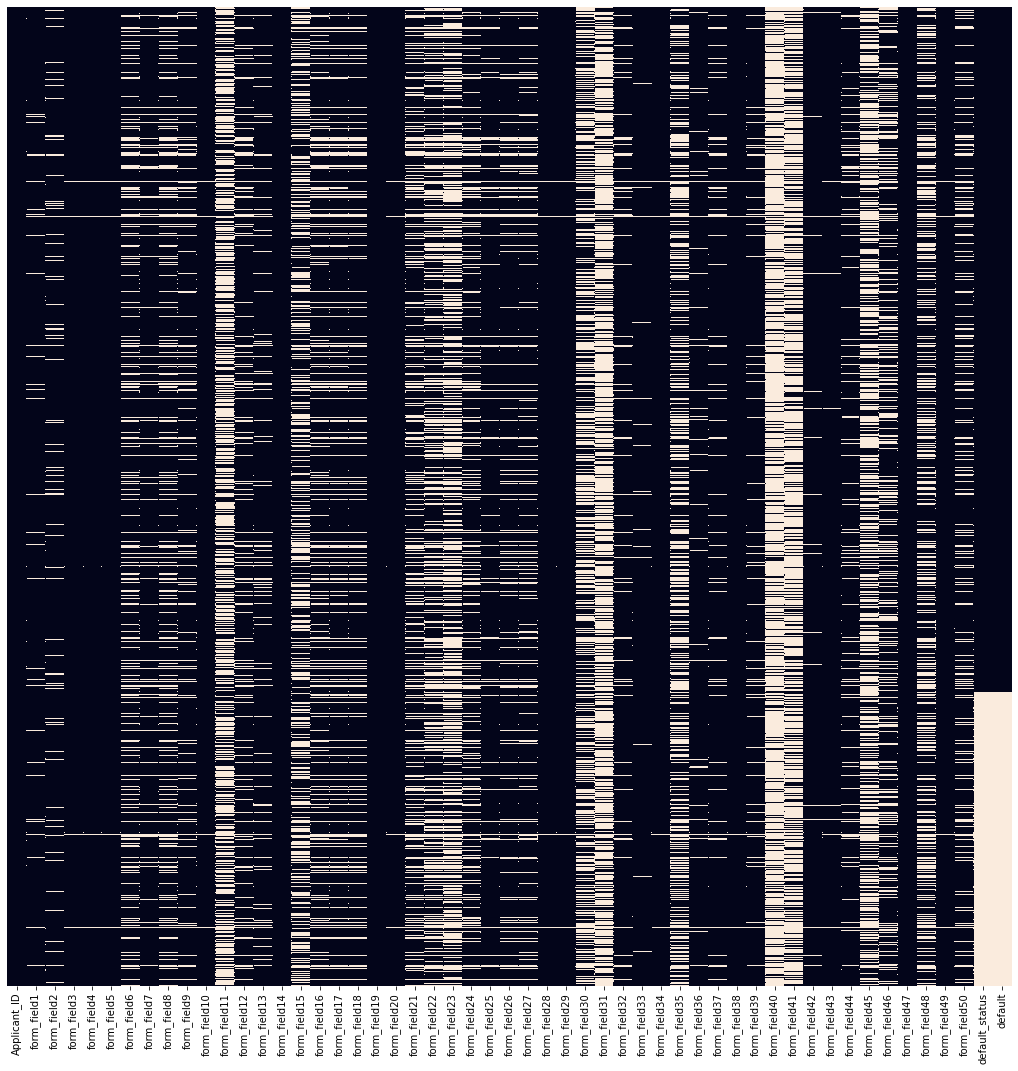

In [22]:
plt.figure(figsize=(18,18))
sns.heatmap(all_data.isnull(), yticklabels = False, cbar=False)

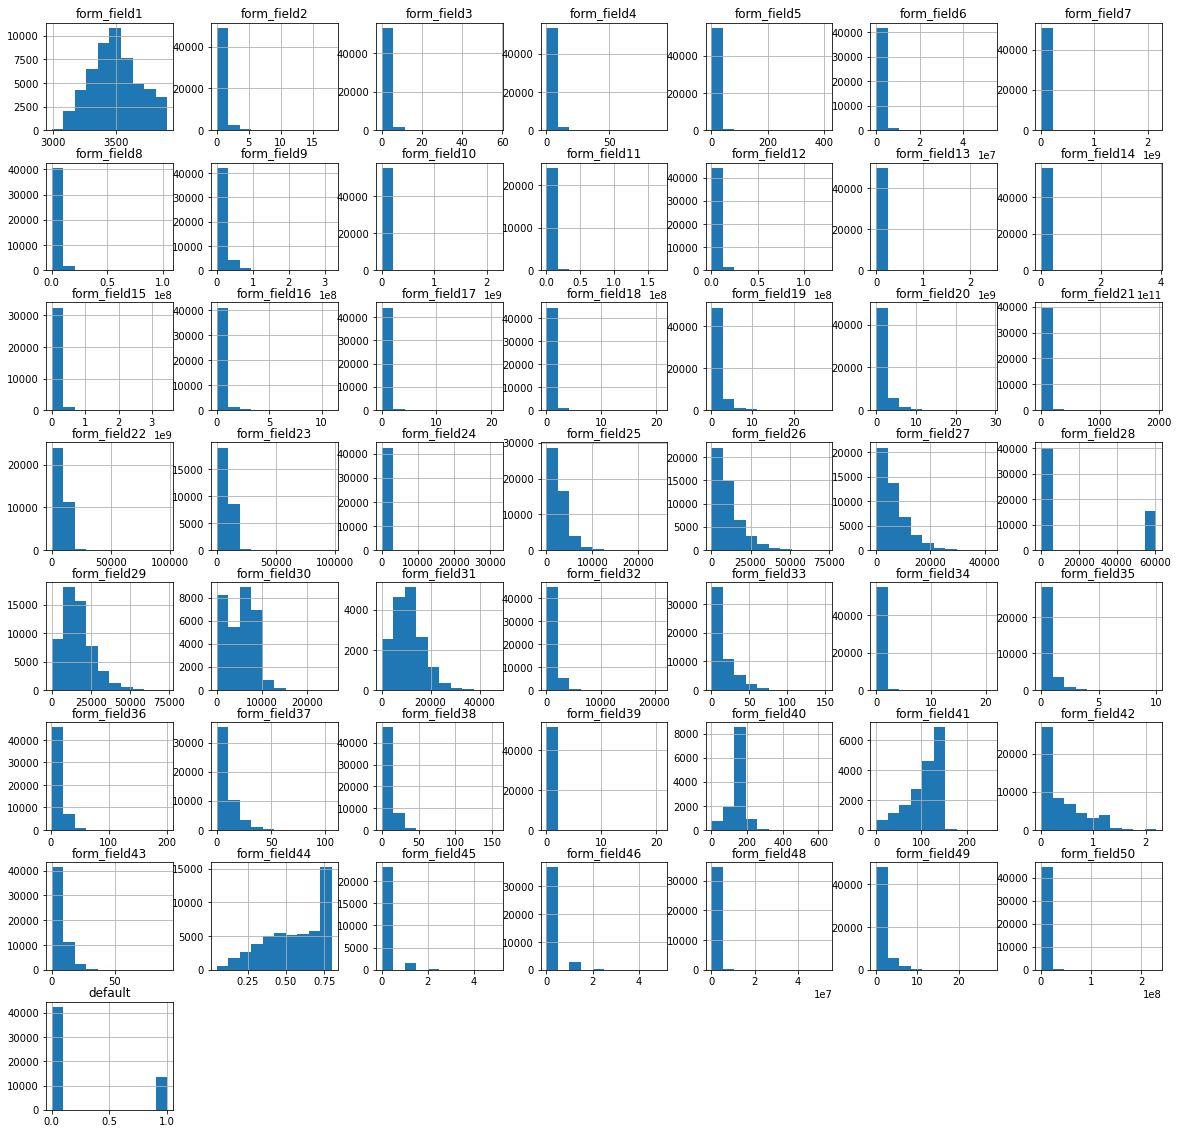

In [23]:
#find the histogram distribution of the numerical column
data.hist(figsize = (20,20))
plt.show()
# many columns are skewed hence do not follow the guassian distribution, we will 
#deal with that later

In [24]:
#confirm the skewness of the numerical columns
data.skew().sort_values()

form_field41     -0.972525
form_field44     -0.438634
form_field30      0.038387
form_field1       0.120458
form_field40      0.150334
form_field31      0.738210
form_field22      0.799056
form_field23      0.901040
form_field29      0.933382
form_field28      0.993735
form_field42      1.183635
default           1.186399
form_field27      1.452973
form_field26      1.471489
form_field33      1.565371
form_field43      1.638080
form_field25      1.711413
form_field21      1.714100
form_field37      1.949271
form_field32      2.447196
form_field49      2.623440
form_field36      2.634626
form_field38      2.722392
form_field20      3.174999
form_field19      3.327070
form_field9       3.503331
form_field8       3.935070
form_field16      3.999875
form_field46      4.031525
form_field35      4.167426
form_field3       4.233351
form_field2       4.299532
form_field12      4.734462
form_field45      4.737307
form_field18      4.966005
form_field17      5.044450
form_field4       5.427310
f

In [25]:
#we can also find the value of tail for each column
data.kurt()

form_field1        -0.613786
form_field2        34.353007
form_field3        33.556539
form_field4        45.488654
form_field5       173.981887
form_field6        87.678098
form_field7      3351.298103
form_field8        41.461573
form_field9        21.120070
form_field10      981.240131
form_field11      166.233151
form_field12       45.782858
form_field13     4860.848413
form_field14    15527.393317
form_field15       76.527472
form_field16       24.497313
form_field17       50.982963
form_field18       49.526614
form_field19       18.238157
form_field20       16.783052
form_field21       43.547447
form_field22        3.454026
form_field23        4.110466
form_field24     1522.146068
form_field25        5.663182
form_field26        2.691958
form_field27        2.715219
form_field28       -1.007478
form_field29        1.193729
form_field30       -0.846308
form_field31        0.917053
form_field32       12.838088
form_field33        2.681943
form_field34       78.019000
form_field35  

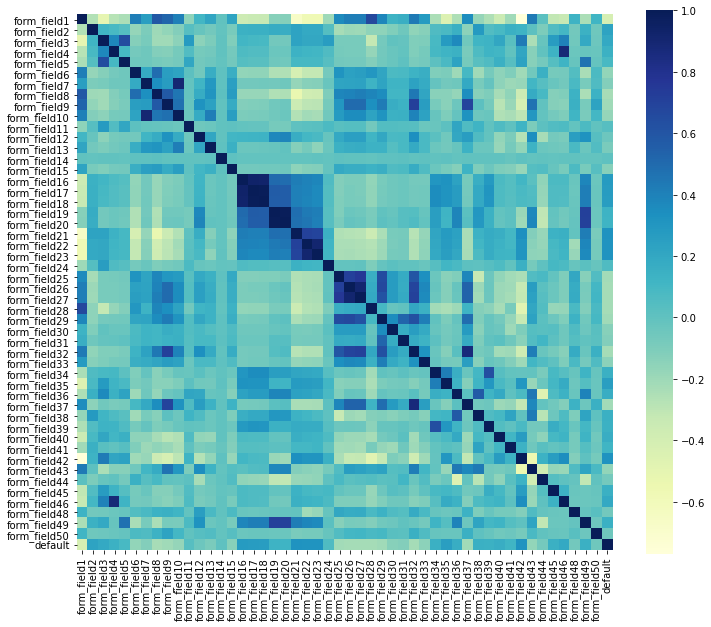

In [26]:
# visualize the correlation between the features and the target variable
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), square=True, cmap="YlGnBu")
plt.show()

In [27]:
#convert categorical variable into numerabsic
categorical = ['form_field47']
all_dummies = pd.get_dummies(all_data, prefix_sep='_', columns= categorical,drop_first=True)

In [28]:
all_data = all_dummies
all_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,default,form_field47_lending
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,2.02,0.711632,0.0,0.0,NaN,1.129518,0.044335,no,0.0,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,8.08,0.183584,NaN,0.0,349.805730,1.620483,0.322436,no,0.0,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,18.18,0.791136,0.0,0.0,NaN,1.513370,0.011640,yes,1.0,0
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,2.02,0.685168,NaN,0.0,89.940100,0.664452,0.082729,no,0.0,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,12.12,0.438168,0.0,0.0,97.887502,1.427891,0.045630,no,0.0,0


In [29]:
all_data = all_data.drop(['Applicant_ID','default_status'], axis = 1)

### split into train and test

In [30]:
train = all_data[:ntrain]
test = all_data[ntrain:] 

In [31]:
test.drop('default', axis = 1, inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
# Because most column are highly skewed,it is better to convert into guassian
#distribution as models perform better with a normal distribution data. hence we use np.log.
scaled_tr = np.log(train)
scaled_te = np.log(test)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [33]:
test.shape

(24000, 50)

In [34]:
X = scaled_tr.drop(["default"], axis = 1)
y = train['default']

In [35]:
#from sklearn.model_selection import train_test_split
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)

# Train Data on Model and check metrics

In [ ]:
#we use catboost, a tree based model that is accurate for non linear data
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score
from catboost import Pool, CatBoostClassifier, cv


In [ ]:
#stratifiedKFold is used to enable the model train on multiple validation data hence boost the accuracy
cmodel = CatBoostClassifier(learning_rate = 0.01,iterations=6000,max_depth=9, eval_metric='AUC', use_best_model=True,
                           random_seed=452)
from sklearn.model_selection import StratifiedKFold
score = []
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

for train_index, valid_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", valid_index)
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    cmodel.fit(X_train,y_train, eval_set=[(X_valid, y_valid)],early_stopping_rounds=100, verbose=100)
    prediction = cmodel.predict(X_valid)
    print(roc_auc_score(prediction, y_valid))
    test_pred = cmodel.predict_proba(scaled_te)[:,1]
    score.append(test_pred)

In [ ]:
#print the output result as a CSV
#test_pred = cmodel.predict_proba(test)[:,1]
sample = pd.read_csv('SampleSubmission.csv')
test_id = sample['Applicant_ID']
output = pd.DataFrame({'Applicant_ID': test_id,
                      'default_status': test_pred})
output.to_csv('ffour.csv', index=False)